# h3: the best hexagons grid ever forever

In [60]:
import json
import h3
import matplotlib.pyplot as plt
import random
import itertools

In [41]:
with open('countries.geojson', 'r') as file:
    geojson_data = json.load(file)

countries = ['Israel', 'Syria', 'Lebanon']
country_borders = {}

for country in countries:
    for feature in geojson_data['features']:
        if feature['properties']['ADMIN'] == country:
            country_borders[country] = feature['geometry']

# Print the borders for each country
for country, border in country_borders.items():
    country_borders[country] = [(p[1], p[0]) for p in border['coordinates'][0]]

In [88]:
def plot_coord(c):
    plt.scatter(c[0], c[1], color='orange')

def plot_polygon(poly, color='gray'):
    plt.plot([c[1] for c in poly] + [poly[0][1]], [c[0] for c in poly]+ [poly[0][0]], color, alpha=0.5)
    plt.axis('equal')
    plt.grid(True)
    plt.xlim(34, 38)
    plt.ylim(32, 35)

def plot_borders():
    for country in countries:
        plot_polygon(country_borders[country])

In [93]:
def hexagons_of_res(res=6):
    return list(set([h3.geo_to_h3(lat, lng, res) for lat, lng in 
                     itertools.product([x / 100 for x in range(3250, 3400)], [x / 100 for x in range(3500, 3650)])
                    ]))

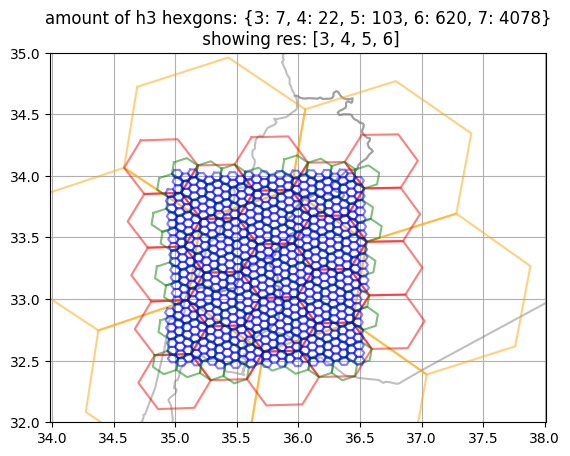

In [107]:
plot_borders()

hexagons_numbers = {res: len(hexagons_of_res(res)) for res in range(3, 8)}

res_to_show = [3, 4,5,6]

plt.title(f'amount of h3 hexgons: {hexagons_numbers}\n showing res: {res_to_show}')

for res, color in zip(res_to_show, ['orange', 'red', 'green', 'blue']):
    region_hexagons_idx = hexagons_of_res(res)
    region_hexagons_poly = [h3.h3_to_geo_boundary(h, geo_json=False) for h in region_hexagons_idx]
    
    for h in region_hexagons_poly:
        plot_polygon(h, color=color)

## use hexagons of lower res in safer/constant areas and higer res in riskier/non-constant areas?
## plan a path between hexagons (discrete) instead of continuous?